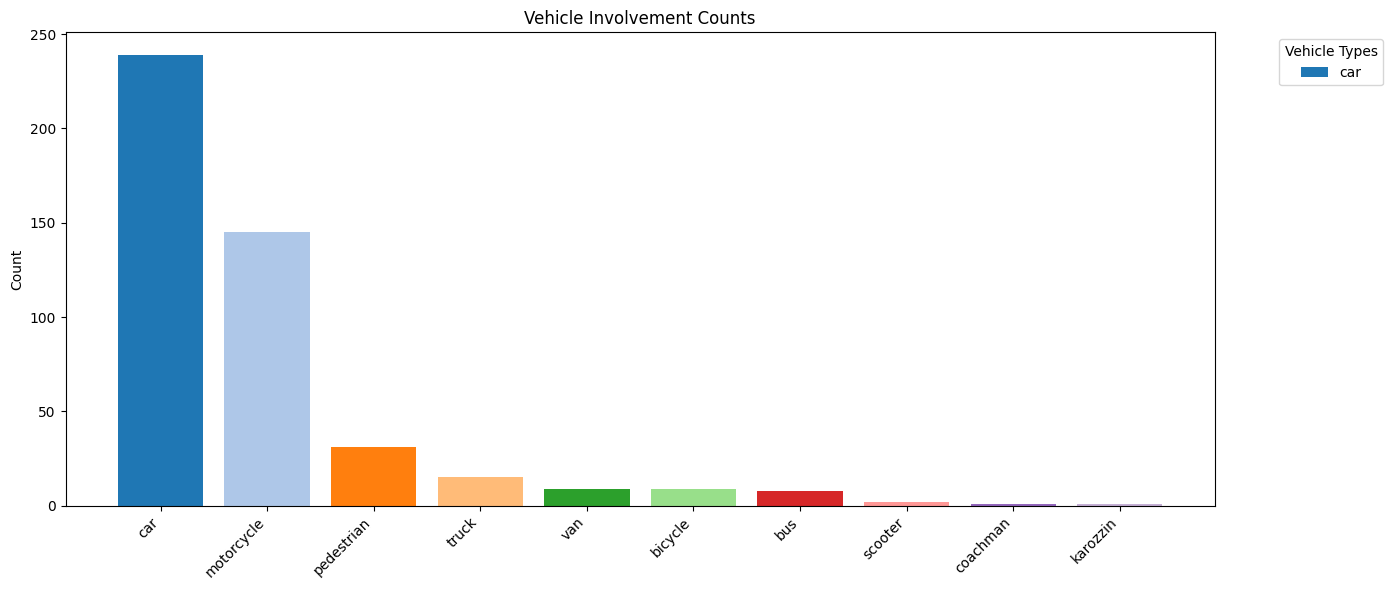

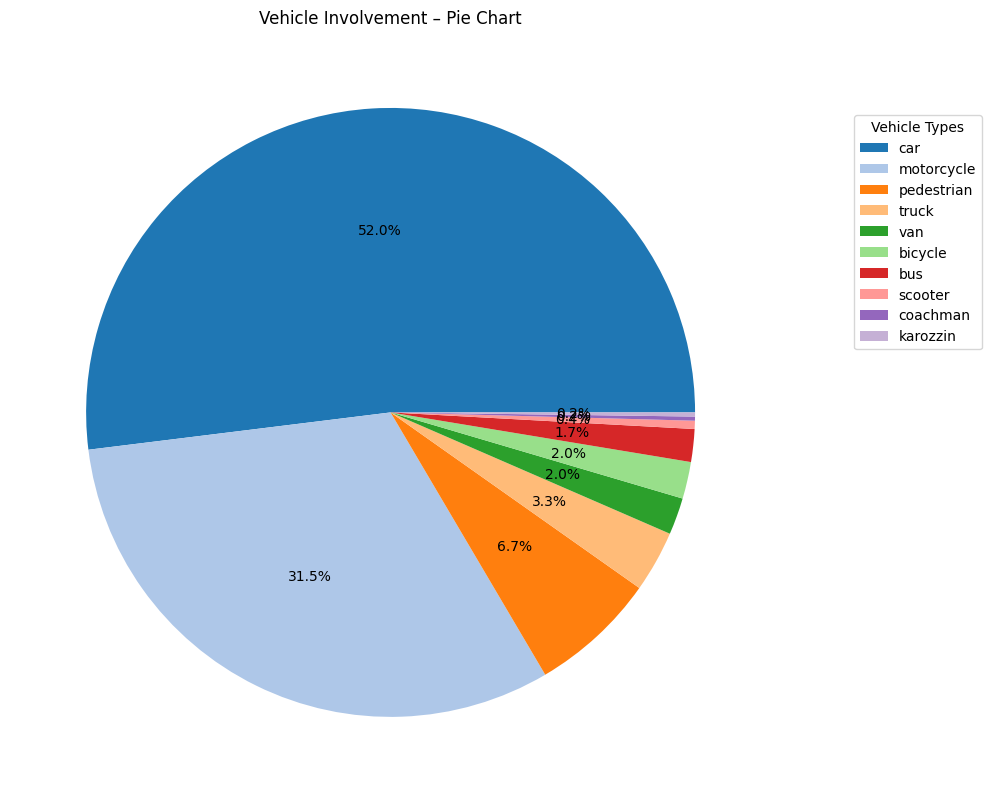

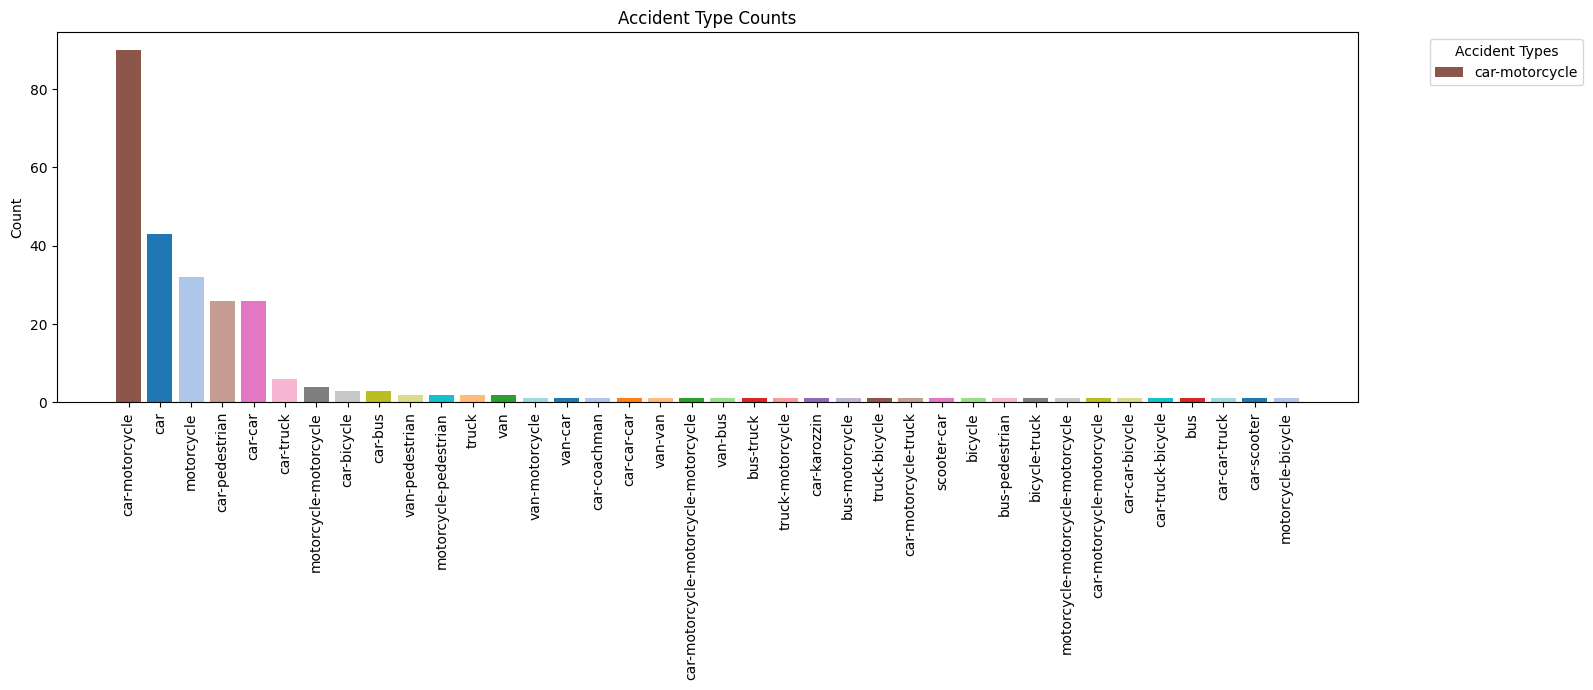

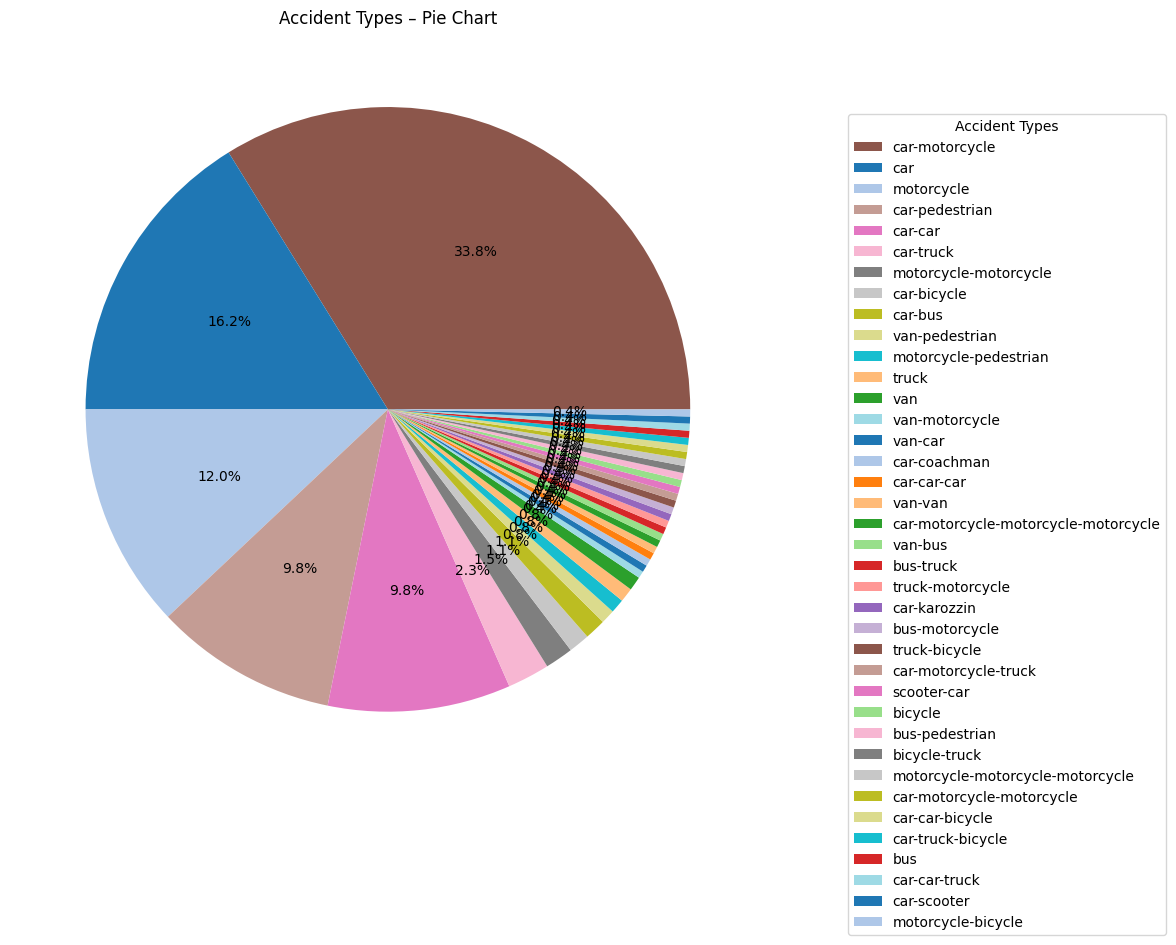

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import re


raw = """car-motorcycle
car-motorcycle
van-motorcycle
car-motorcycle
car-motorcycle
car-motorcycle
van-car
motorcycle-motorcycle
car-motorcycle
car-pedestrian
motorcycle
car-pedestrian
car-pedestrian
motorcycle
car-pedestrian
van-pedestrian
car
car-bicycle
car-coachman
car
car-motorcycle
car-car
van-pedestrian
car-motorcycle
car
motorcycle
car
car-car-car
car-motorcycle
motorcycle
car-pedestrian
car-motorcycle
car-pedestrian
van-van
motorcycle
car-pedestrian
motorcycle-pedestrian
car-motorcycle-motorcycle-motorcycle
car-bicycle
van-bus
car
car-motorcycle
car
car-car
car-pedestrian
car-pedestrian
car
car-motorcycle
motorcycle
car-pedestrian
car-motorcycle
car-car
car-motorcycle
motorcycle
car-motorcycle
car
car-motorcycle
car-motorcycle
motorcycle
car-motorcycle
car
car
car-motorcycle
car-truck
car-motorcycle
car-car
car-motorcycle
car-pedestrian
car-motorcycle
car-motorcycle
car-motorcycle
car-motorcycle
car-car
motorcycle 
car-pedestrian
car-pedestrian
car
motorcycle 
car-motorcycle
car-motorcycle
car-pedestrian
car-motorcycle
car
bus-truck
car
car-motorcycle
car
car-bus
car-motorcycle
car-motorcycle
car-motorcycle
car
motorcycle 
car-motorcycle
car-motorcycle
car-motorcycle
truck-motorcycle
car
car-karozzin
car-motorcycle
car
car-motorcycle
motorcycle 
car
car
car-bus
truck
car-car
car-pedestrian
motorcycle 
Bus-motorcycle
car-truck
car-pedestrian
car
motorcycle
car-motorcycle
car-motorcycle
car-car
truck-bicycle
car
car-motorcycle
car-motorcycle
car-bus
car-car
car-motorcycle-truck
car-motorcycle
car-pedestrian
motorcycle
car-motorcycle
car-motorcycle
car-car
motorcycle
car-motorcycle
motorcycle
car-motorcycle
car-motorcycle
car-motorcycle
car-motorcycle
car-motorcycle
car-motorcycle
car-truck
car-motorcycle
car-motorcycle
car 
scooter-car
bicycle
car-car
motorcycle
motorcycle
car-motorcycle
car-car
car-motorcycle
motorcycle
bus-pedestrian
car-motorcycle
car-motorcycle

car-motorcycle

car
car-motorcycle
car-pedestrian
motorcycle
motorcycle
car-pedestrian
bicycle-truck
car-motorcycle
motorcycle-pedestrian
car-pedestrian
motorcycle-motorcycle-motorcycle
car-pedestrian
motorcycle
car-motorcycle
car-bicycle
car-motorcycle
car-pedestrian
motorcycle-motorcycle
car-car
motorcycle
car-motorcycle
car-pedestrian
car-motorcycle motorcycle
car-car-bicycle
motorcycle-motorcycle
car-pedestrian
car-motorcycle
car-car
car
car-motorcycle
car-pedestrian
motorcycle
car
car-motorcycle
car-car
car-motorcycle
motorcycle
truck
car-truck-bicycle
motorcycle
car-motorcycle
bus
car-car
car-pedestrian
car-motorcycle
car-car-truck
car
car-car
car
car-motorcycle
car
car-motorcycle
motorcycle
car
van
car-car
car-motorcycle
car-motorcycle
car-motorcycle
car-car
car-motorcycle
car
van
motorcycle
car-car
car
car-motorcycle
car-motorcycle
car
motorcycle
car-truck
car
car-scooter
car-car
car-motorcycle
car-car
car-motorcycle
car-motorcycle

car-motorcycle
car-car
car-truck
car-motorcycle
car-motorcycle
motorcycle

car-car
motorcycle-bicycle
car
car
car-motorcycle

car
car
car-truck
car-motorcycle
motorcycle-motorcycle
car
car-car
car
motorcycle
car-motorcycle

car-motorcycle
car
car-motorcycle
car
car-car
car
car-motorcycle

car-motorcycle
car
car-car"""

lines = [l.strip() for l in raw.splitlines() if l.strip()]

# counting of individual vehicles
vehicles = Counter()
for line in lines:
    parts = re.split(r"[-\s]+", line.lower())
    for p in parts:
        vehicles[p] += 1

# normalizing of accident type names
def normalize(text):
    parts = re.split(r"[-\s]+", text.strip().lower())
    return "-".join(parts)

accident_types = Counter(normalize(t) for t in lines)

# sorting for readability
vehicles = dict(sorted(vehicles.items(), key=lambda x: x[1], reverse=True))
accident_types = dict(sorted(accident_types.items(), key=lambda x: x[1], reverse=True))

# plotting with legend and colour key

# choose consistent color mapping
unique_labels = list(vehicles.keys()) + list(accident_types.keys())
unique_labels = list(dict.fromkeys(unique_labels))  # remove duplicates
colors = plt.cm.tab20(range(len(unique_labels)))     # 20 distinct colours

color_map = {label: colors[i % 20] for i, label in enumerate(unique_labels)}

# histogram for vehicles

plt.figure(figsize=(14, 6))
plt.bar(vehicles.keys(),
        vehicles.values(),
        color=[color_map[v] for v in vehicles.keys()])
plt.xticks(rotation=45, ha='right')
plt.title("Vehicle Involvement Counts")
plt.ylabel("Count")

plt.legend(vehicles.keys(), title="Vehicle Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# pie chart for vehicles

plt.figure(figsize=(10, 10))
plt.pie(
    vehicles.values(),
    labels=None,
    colors=[color_map[v] for v in vehicles.keys()],
    autopct='%1.1f%%'
)
plt.title("Vehicle Involvement – Pie Chart")

plt.legend(
    vehicles.keys(),
    title="Vehicle Types",
    bbox_to_anchor=(1.1, 0.9),
    loc='upper left'
)
plt.tight_layout()
plt.show()

# histogram for accident types

plt.figure(figsize=(16, 7))
plt.bar(accident_types.keys(),
        accident_types.values(),
        color=[color_map[v] for v in accident_types.keys()])
plt.xticks(rotation=90)
plt.title("Accident Type Counts")
plt.ylabel("Count")

plt.legend(accident_types.keys(), title="Accident Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# pie chart for accident types

plt.figure(figsize=(12, 12))
plt.pie(
    accident_types.values(),
    labels=None,
    colors=[color_map[v] for v in accident_types.keys()],
    autopct='%1.1f%%'
)
plt.title("Accident Types – Pie Chart")

plt.legend(
    accident_types.keys(),
    title="Accident Types",
    bbox_to_anchor=(1.1, 0.9),
    loc='upper left'
)
plt.tight_layout()
plt.show()
